In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"m248r6219","key":"b26e088bb35f91c00c3f6d19c2a98d63"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d smeschke/four-shapes

 42% 9.00M/21.6M [00:00<00:00, 18.7MB/s]
100% 21.6M/21.6M [00:00<00:00, 39.8MB/s]


In [ ]:
import tensorflow as tf
import os
import zipfile
local_zip = 'four-shapes.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
os.mkdir('/content/shapes/train')
os.mkdir('/content/shapes/val')

In [ ]:
os.mkdir('/content/shapes/train/circle')
os.mkdir('/content/shapes/train/square')
os.mkdir('/content/shapes/train/star')
os.mkdir('/content/shapes/train/triangle')

os.mkdir('/content/shapes/val/circle')
os.mkdir('/content/shapes/val/square')
os.mkdir('/content/shapes/val/star')
os.mkdir('/content/shapes/val/triangle')

In [ ]:
base_dir = '/content/shapes/'
circle = os.path.join(base_dir, 'circle')
square = os.path.join(base_dir, 'square')
star = os.path.join(base_dir, 'star')
triangle = os.path.join(base_dir, 'triangle')

In [ ]:
from sklearn.model_selection import train_test_split
train_circledir, val_circledir = train_test_split(os.listdir(circle), test_size = 0.2)
train_squaredir, val_squaredir = train_test_split(os.listdir(square), test_size = 0.2)
train_stardir, val_stardir = train_test_split(os.listdir(star), test_size = 0.2)
train_triangledir, val_triangledir = train_test_split(os.listdir(triangle), test_size = 0.2)

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
train_circle = os.path.join(base_dir, 'train/circle')
train_square = os.path.join(base_dir, 'train/square')
train_star = os.path.join(base_dir, 'train/star')
train_triangle = os.path.join(base_dir, 'train/triangle')

val_circle = os.path.join(base_dir, 'val/circle')
val_square = os.path.join(base_dir, 'val/square')
val_star = os.path.join(base_dir, 'val/star')
val_triangle = os.path.join(base_dir, 'val/triangle')

In [ ]:
import shutil
for i in train_circledir:
  shutil.copy(os.path.join(circle, i), os.path.join(train_circle, i))
for i in train_squaredir:
  shutil.copy(os.path.join(square, i), os.path.join(train_square, i))
for i in train_stardir:
  shutil.copy(os.path.join(star, i), os.path.join(train_star, i))
for i in train_triangledir:
  shutil.copy(os.path.join(triangle, i), os.path.join(train_triangle, i))

for i in val_circledir:
  shutil.copy(os.path.join(circle, i), os.path.join(val_circle, i))
for i in val_squaredir:
  shutil.copy(os.path.join(square, i), os.path.join(val_square, i))
for i in val_stardir:
  shutil.copy(os.path.join(star, i), os.path.join(val_star, i))
for i in val_triangledir:
  shutil.copy(os.path.join(triangle, i), os.path.join(val_triangle, i))

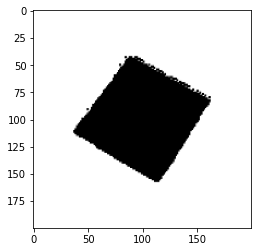

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = image.load_img('/content/shapes/train/square/1002.png')
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=4,  
        class_mode='categorical',
        )
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical',
        )

Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [ ]:
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs ={}):        
        if(logs.get('accuracy')> 0.97 and logs.get('val_accuracy')> 0.97): 
            print("\n 97% acc reached")
            self.model.stop_training = True
callbacks = CustomCallbacks()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=40, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2,
      callbacks=[callbacks])

Epoch 1/40
25/25 - 3s - loss: 3.4075 - accuracy: 0.5200 - val_loss: 1.1259 - val_accuracy: 0.3000
Epoch 2/40
25/25 - 2s - loss: 0.7334 - accuracy: 0.7000 - val_loss: 0.5997 - val_accuracy: 0.7000
Epoch 3/40
25/25 - 2s - loss: 0.6220 - accuracy: 0.7600 - val_loss: 0.4441 - val_accuracy: 0.8500
Epoch 4/40
25/25 - 2s - loss: 0.5898 - accuracy: 0.7700 - val_loss: 0.4414 - val_accuracy: 0.9000
Epoch 5/40
25/25 - 2s - loss: 0.2783 - accuracy: 0.9300 - val_loss: 0.2405 - val_accuracy: 0.9500
Epoch 6/40
25/25 - 2s - loss: 0.3657 - accuracy: 0.8900 - val_loss: 0.2013 - val_accuracy: 0.9500
Epoch 7/40
25/25 - 2s - loss: 0.4349 - accuracy: 0.8800 - val_loss: 0.0850 - val_accuracy: 1.0000
Epoch 8/40
25/25 - 2s - loss: 0.1215 - accuracy: 0.9700 - val_loss: 0.0865 - val_accuracy: 0.9500
Epoch 9/40
25/25 - 2s - loss: 0.2057 - accuracy: 0.9200 - val_loss: 0.0721 - val_accuracy: 0.9500
Epoch 10/40
25/25 - 2s - loss: 0.1646 - accuracy: 0.9600 - val_loss: 0.0747 - val_accuracy: 0.9500
Epoch 11/40
25/25 -

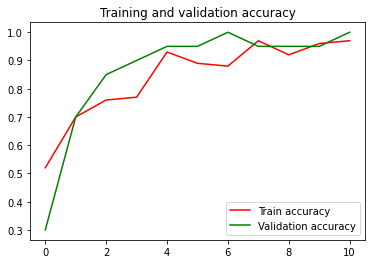

<Figure size 432x288 with 0 Axes>

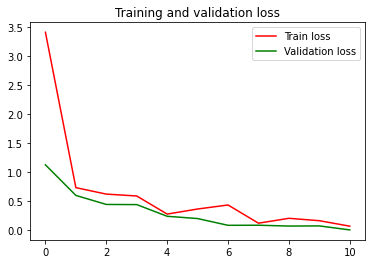

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpha9d26rp/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)